In [1]:
from IPython.display import display_html
display_html("""<button onclick="$('.input, .prompt, .output_stderr, .output_error').toggle();">Toggle Code</button>""", raw=True)

Toggle Code

# Investigate survived from Titanic
by NK Zhehua Zou

### About Dataset
This data set contains 891 passengers with 12 variables.

### Description of attributes:
1) PassengerID: ID number of passenger.  
2) Survived: status of survival, 0=false, 1=true.  
3) Pclass: class of passenger, 1=1st, 2=2nd, 3=3rd.  
4) Name: name.  
5) Sex: sex.  
6) Age: age.  
7) SibSp: the number of siblings/spouses aboard.  
8) Parch: the number of parents/children aboard.  
9) Ticket: ticket's number.  
10) Fare: passenger's fare.  
11) Cabin: carbin.  
12) Embarked: port of embarkation, C=Cherbourg, Q=Queenstown, S=Southampton.

# Analysis Section
Let's focus on these 3 variables: **Pclass**, **sex** and **age**, because the movie told us these factors influenced the chances of survival for the passengers on the Titanic. 

In [2]:
# Load required packages and libraries.
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
# division by float
from __future__ import division
# for hypothesis testing
import scipy
from scipy import stats

In [3]:
# Load dataset
titanic_df = pd.read_csv('titanic-data.csv')

In [4]:
# First step, how many passengers in this dataset?
print '1) This dataset includes ' + str(len(titanic_df)) + ' passengers.'

1) This dataset includes 891 passengers.


2) Struction of the dataset:

In [5]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


3) We remove these varibles (PassengerId, Name, Ticket, Cabin) from dataset since they are unneccesary in the investigation.

In [6]:
# drop unnecessary columns
titanic_df = titanic_df.drop(['PassengerId','Name', 'Ticket', 'Cabin'], axis=1)

In [7]:
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


4) Missing values  
According to the follow info, we found two variables have missing values.

In [8]:
titanic_df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

### 1 - Survivors with Pclass
**You will get more oppotunity for survived if you live in a high level room!**  
a) Over half of passengers from 1rd class were survived. 63% passengers were survived.  
b) There is not significant defference in 2nd class. 47% passengers were survived.  
c) Chance of dead is two times of chance of survival in 3rd class.Only 24% passengers were survived.  
d) Over half of passengers live in 3rd class rooms.

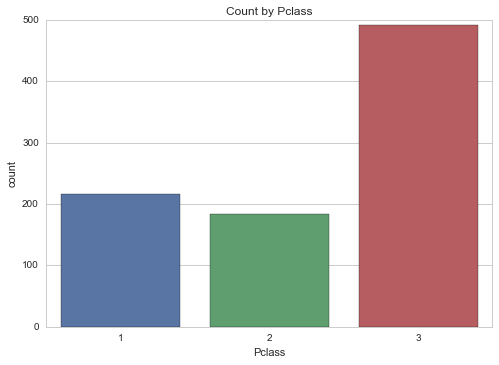

In [9]:
sns.countplot(x='Pclass', data=titanic_df)
sns.plt.title('Count by Pclass')

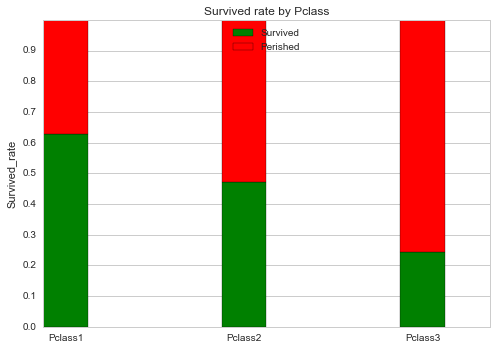

In [10]:
# count
count_class1 = len(titanic_df[titanic_df['Pclass'] == 1])
count_class2 = len(titanic_df[titanic_df['Pclass'] == 2])
count_class3 = len(titanic_df[titanic_df['Pclass'] == 3])

# survived_rate
count_class1_survived = len(titanic_df[(titanic_df['Survived'] == 1) &  
                                            (titanic_df['Pclass'] == 1)])
survived_rate_class1 = count_class1_survived/count_class1
count_class2_survived = len(titanic_df[(titanic_df['Survived'] == 1) &  
                                            (titanic_df['Pclass'] == 2)])
survived_rate_class2 = count_class2_survived/count_class2
count_class3_survived = len(titanic_df[(titanic_df['Survived'] == 1) &  
                                            (titanic_df['Pclass'] == 3)])
survived_rate_class3 = count_class3_survived/count_class3

# perished_rate
count_class1_perished = len(titanic_df[(titanic_df['Survived'] == 0) &  
                                            (titanic_df['Pclass'] == 1)])
perished_rate_class1 = count_class1_perished/count_class1
count_class2_perished = len(titanic_df[(titanic_df['Survived'] == 0) &  
                                            (titanic_df['Pclass'] == 2)])
perished_rate_class2 = count_class2_perished/count_class2
count_class3_perished = len(titanic_df[(titanic_df['Survived'] == 0) &  
                                            (titanic_df['Pclass'] == 3)])
perished_rate_class3 = count_class3_perished/count_class3

N = 3

survived_rate = (survived_rate_class1, survived_rate_class2, survived_rate_class3)
perished_rate = (perished_rate_class1, perished_rate_class2, perished_rate_class3)

ind = np.arange(N)    # the x locations for the groups
width = 0.25       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, survived_rate, width, color='green')
p2 = plt.bar(ind, perished_rate, width, color='red', bottom=survived_rate)

plt.ylabel('Survived_rate')
plt.title('Survived rate by Pclass')
plt.xticks(ind + width/2., ('Pclass1', 'Pclass2', 'Pclass3'))
plt.yticks(np.arange(0, 1, 0.1))
plt.legend((p1[0], p2[0]), ('Survived', 'Perished'), loc='upper center')

plt.show()

### 2 - Survivors with Sex
a) Male passengers are more than female passengers.  
b) Female have more oppotunity of survival. Only 19% male passengers were survived, but 74% female passengers were survived.

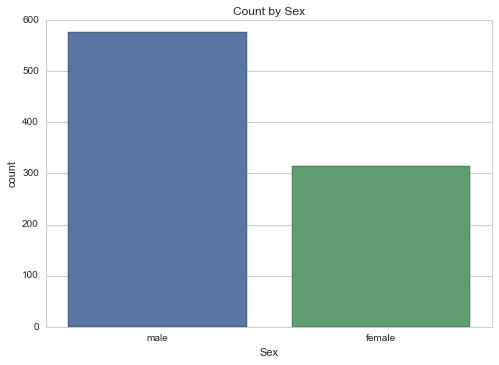

In [11]:
sns.countplot(x='Sex',  data=titanic_df)
sns.plt.title('Count by Sex')

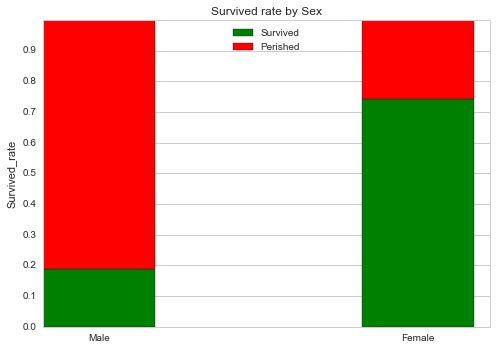

In [12]:
# count
count_male = len(titanic_df[titanic_df['Sex'] == 'male'])
count_female = len(titanic_df[titanic_df['Sex'] == 'female'])

# survived_rate
count_male_survived = len(titanic_df[(titanic_df['Survived'] == 1) &  
                                            (titanic_df['Sex'] == 'male')])
survived_rate_male = count_male_survived/count_male
count_female_survived = len(titanic_df[(titanic_df['Survived'] == 1) &  
                                            (titanic_df['Sex'] == 'female')])
survived_rate_female = count_female_survived/count_female

# perished_rate
count_male_perished = len(titanic_df[(titanic_df['Survived'] == 0) &  
                                            (titanic_df['Sex'] == 'male')])
perished_rate_male = count_male_perished/count_male
count_female_perished = len(titanic_df[(titanic_df['Survived'] == 0) &  
                                            (titanic_df['Sex'] == 'female')])
perished_rate_female = count_female_perished/count_female

N = 2

survived_rate = (survived_rate_male, survived_rate_female)
perished_rate = (perished_rate_male, perished_rate_female)

ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, survived_rate, width, color='green')
p2 = plt.bar(ind, perished_rate, width, color='red', bottom=survived_rate)

plt.ylabel('Survived_rate')
plt.title('Survived rate by Sex')
plt.xticks(ind + width/2., ('Male', 'Female'))
plt.yticks(np.arange(0, 1, 0.1))
plt.legend((p1[0], p2[0]), ('Survived', 'Perished'), loc='upper center')

plt.show()

### 3 - Survivors with age
a) Number of adults is greater than children.
b) Children have high chance of survival.

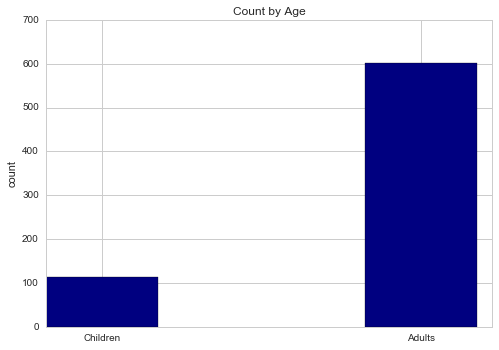

In [13]:
count_children = len(titanic_df[titanic_df['Age']<18])
count_adults = len(titanic_df[titanic_df['Age']>=18])

N = 2
count = (count_children, count_adults)

ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, count, width, color='navy')

plt.ylabel('count')
plt.title('Count by Age')
plt.xticks(ind + width/2., ('Children', 'Adults'))

plt.show()

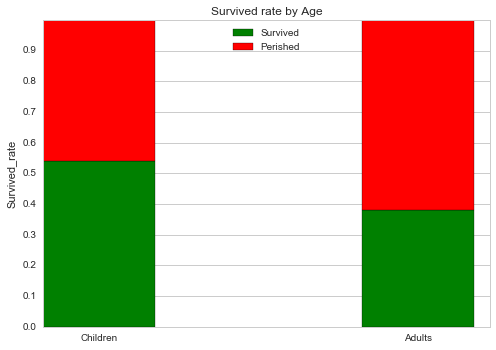

In [14]:
# count
count_children = len(titanic_df[titanic_df['Age']<18])
count_adults = len(titanic_df[titanic_df['Age']>=18])

# survived_rate
count_children_survived = len(titanic_df[(titanic_df['Survived']==1) & 
                                     (titanic_df['Age']<18)])
survived_rate_children = count_children_survived/count_children
count_adults_survived = len(titanic_df[(titanic_df['Survived']==1) & 
                                     (titanic_df['Age']>=18)])
survived_rate_adults = count_adults_survived/count_adults

# perished_rate
count_children_perished = len(titanic_df[(titanic_df['Survived']==0) & 
                                     (titanic_df['Age']<18)])
perished_rate_children = count_children_perished/count_children
count_adults_perished = len(titanic_df[(titanic_df['Survived']==0) & 
                                     (titanic_df['Age']>=18)])
perished_rate_adults = count_adults_perished/count_adults

N = 2
survived_rate = (survived_rate_children, survived_rate_adults)
perished_rate = (perished_rate_children, perished_rate_adults)

ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, survived_rate, width, color='green')
p2 = plt.bar(ind, perished_rate, width, color='red', bottom=survived_rate)

plt.ylabel('Survived_rate')
plt.title('Survived rate by Age')
plt.xticks(ind + width/2., ('Children', 'Adults'))
plt.yticks(np.arange(0, 1, 0.1))
plt.legend((p1[0], p2[0]), ('Survived', 'Perished'), loc='upper center')

plt.show()

### 4 - Survivors with parch or sibsp
People have higher chance of survival if they have 1 - 2 parch or sibsp, but only half oppotunity of survived.  
I have to say that I don't think there is a significant difference.

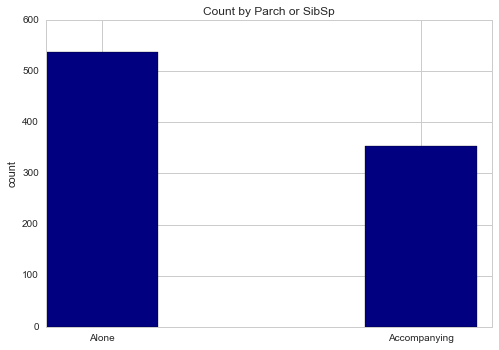

In [15]:
count_alone = len(titanic_df[(titanic_df['Parch']==0) & 
                                     (titanic_df['SibSp']==0)])
count_accompanying = len(titanic_df[(titanic_df['Parch']!=0) | 
                                     (titanic_df['SibSp']!=0)])

N = 2
count = (count_alone, count_accompanying)

ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, count, width, color='navy')

plt.ylabel('count')
plt.title('Count by Parch or SibSp')
plt.xticks(ind + width/2., ('Alone', 'Accompanying'))

plt.show()

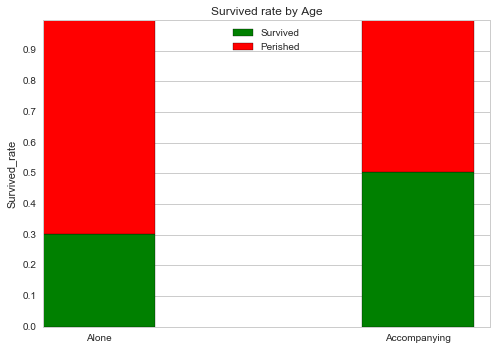

In [16]:
# count
count_alone = len(titanic_df[(titanic_df['Parch']==0) & 
                                     (titanic_df['SibSp']==0)])
count_accompanying = len(titanic_df[(titanic_df['Parch']!=0) | 
                                     (titanic_df['SibSp']!=0)])

# survived_rate
count_alone_survived = len(titanic_df[(titanic_df['Survived']==1) & 
                                     (titanic_df['Parch']==0) & 
                                     (titanic_df['SibSp']==0)])
survived_rate_alone = count_alone_survived/count_alone
count_accompanying_survived = len(titanic_df[(titanic_df['Survived']==1) & 
                                     ((titanic_df['Parch']!=0) | 
                                     (titanic_df['SibSp']!=0))])
survived_rate_accompanying = count_accompanying_survived/count_accompanying

# perished_rate
count_alone_perished = len(titanic_df[(titanic_df['Survived']==0) & 
                                     (titanic_df['Parch']==0) & 
                                     (titanic_df['SibSp']==0)])
perished_rate_alone = count_alone_perished/count_alone
count_accompanying_perished = len(titanic_df[(titanic_df['Survived']==0) & 
                                     ((titanic_df['Parch']!=0) | 
                                     (titanic_df['SibSp']!=0))])
perished_rate_accompanying = count_accompanying_perished/count_accompanying

N = 2
survived_rate = (survived_rate_alone, survived_rate_accompanying)
perished_rate = (perished_rate_alone, perished_rate_accompanying)

ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, survived_rate, width, color='green')
p2 = plt.bar(ind, perished_rate, width, color='red', bottom=survived_rate)

plt.ylabel('Survived_rate')
plt.title('Survived rate by Age')
plt.xticks(ind + width/2., ('Alone', 'Accompanying'))
plt.yticks(np.arange(0, 1, 0.1))
plt.legend((p1[0], p2[0]), ('Survived', 'Perished'), loc='upper center')

plt.show()

### 2) Correlation between each variables

### 1 - Sex vs. Age vs. Survived
a) There is nothing difference for male passengers, they have same mean of age between dead and survived.  
b) Older female passengers have higher chance to survived than younger female passengers.  
c) Most of passengers are 18 - 38 years old, male passengers' ages are older than female passengers' ages.

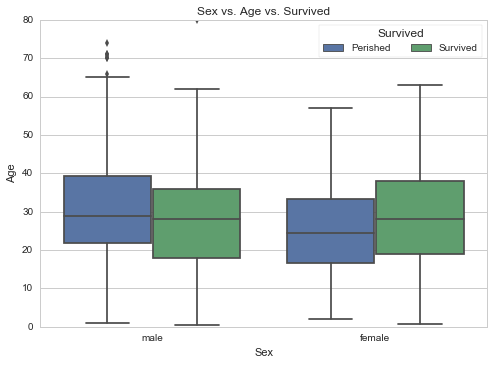

In [17]:
sns.boxplot(x="Sex",y="Age",hue="Survived", data=titanic_df)
leg = plt.legend(title='Survived', ncol=2, frameon=True)
for n, status in enumerate(['Perished', 'Survived']):
    leg.get_texts()[n].set_text(status)
sns.plt.title('Sex vs. Age vs. Survived')

### 2 - Fare vs. Pclass vs. Survived
a) Passengers live in higher level room have higher chance of survival.  
b) People who are paid more expensive fare will get higher chance of syrvival even they live in same level room.  
c) People need to pay more money for higher level room.  
d) Another word, people need to spend more money to increate their change of survival.  
e) Passengers live in higher level room have higher chance of survival. It is possible that the higher levels are closer to the exit and lifeboats, thus they are the first to escape. 

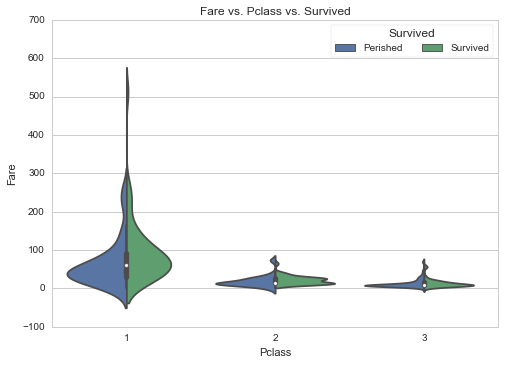

In [18]:
sns.violinplot(x='Pclass', y='Fare', data=titanic_df, hue='Survived', split=True)
leg = plt.legend(title='Survived', ncol=2, frameon=True)
for n, status in enumerate(['Perished', 'Survived']):
    leg.get_texts()[n].set_text(status)
sns.plt.title('Fare vs. Pclass vs. Survived')

# 3 - Embardked vs. Pclass vs. Survived
a) We found people embarked from Southampton have higher chance of survival than people envarked from Queenstown.  
b) Because people have more oppotunity to buy tickets for 1st class room if they embardked from Southhampton.  
c) We can say that Embardked influenced survival even if we know the real reason is Pclass.

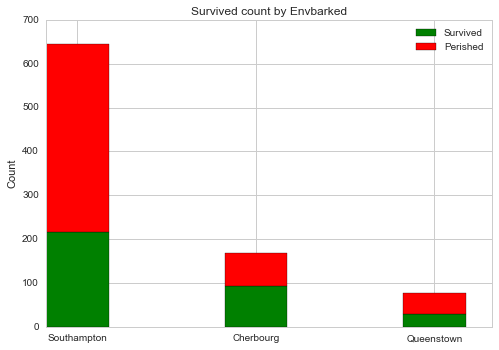

In [19]:
# survived
count_S_survived = len(titanic_df[(titanic_df['Survived'] == 1) &  
                                            (titanic_df['Embarked'] == 'S')])
count_C_survived = len(titanic_df[(titanic_df['Survived'] == 1) &  
                                            (titanic_df['Embarked'] == 'C')])
count_Q_survived = len(titanic_df[(titanic_df['Survived'] == 1) &  
                                            (titanic_df['Embarked'] == 'Q')])

# perished
count_S_perished = len(titanic_df[(titanic_df['Survived'] == 0) &  
                                            (titanic_df['Embarked'] == 'S')])
count_C_perished = len(titanic_df[(titanic_df['Survived'] == 0) &  
                                            (titanic_df['Embarked'] == 'C')])
count_Q_perished = len(titanic_df[(titanic_df['Survived'] == 0) &  
                                            (titanic_df['Embarked'] == 'Q')])

N = 3

survived = (count_S_survived, count_C_survived, count_Q_survived)
perished = (count_S_perished, count_C_perished, count_Q_perished)

ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, survived, width, color='green')
p2 = plt.bar(ind, perished, width, color='red', bottom=survived)

plt.ylabel('Count')
plt.title('Survived count by Envbarked')
plt.xticks(ind + width/2., ('Southampton', 'Cherbourg', 'Queenstown'))
plt.legend((p1[0], p2[0]), ('Survived', 'Perished'))

plt.show()

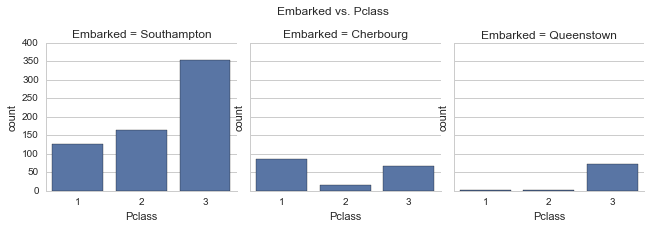

In [20]:
h=sns.FacetGrid(titanic_df, col="Embarked")
h.map(sns.countplot,"Pclass")
h.set(xlabel='Pclass', ylabel='count')
h.fig.suptitle('Embarked vs. Pclass', y=1.05)

titles = ('Southampton', 'Cherbourg', 'Queenstown')
for ax, title in zip(h.axes.flat, titles):
    ax.set_title('Embarked = {}'.format(title))

### 3) Conclusion
a) Less half of passengers were survived from the Titanic.  
b) The survival rate of female passengers was much greater than that of male passengers.  
c) A higher percentage of children made it through as compared to the adults.  
d) The survival rate of 1st class passengers was much greater than that of 3rd class passengers.  
e) I don't think there is a strong correlation between sibsp/parch with survived.   
f) We can say that Embardked influenced survival even if we know the real reason is Pclass.  
  
##### limitation and bias: 
more male passenger than female passenger thus might affect the survival ratio.
It is possible there is a priority on who gets the lifeboat first, for example children, senior, and women are usually before male. Also infants who needs their mothers might gets on the lifeboat together. These can all be factors that change the outcome of study.  
Partial data was collected some with missing age, this will limit the accuracy of the analysis of gender and class which is possible to skew the results from what happened in reality. Also this dataset was at least in part collected after the titanic sank. This means that there's significant survivor bias.  
In addition, even though our study showed female, higher class, children have higher survival but these factors are not the cause of survival since strong correlation does not imply causation.